# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования
Выполнили студенты гр. 9382 Павлов Роман и Поплавский Иван.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Дискретный сигнал $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Дискретное преобразование Фурье. Так как $\displaystyle s(t)$ переодическая функция, то её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$\displaystyle X(n)=\dfrac{1}{NT}\int_0^{NT}s(t)\cdot e^{-i\omega_nt}\mathrm{d}x \\ X(n) = \sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi nk}{N}} , где  \displaystyle n = 0,1,\dots,N-1$$

Линейное преобразование по 5 точкам: $H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

Линейное преобразование по 9 точкам: $H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

## Выполнение работы

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта ($N=31$).

In [72]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
np.random.seed(14)

In [73]:
def analog_signal(n):
    x = np.linspace(0, n, 1024)
    omegas = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    A_coeffs = np.random.randint(1, 11, 11)
    phases = np.random.uniform(0, 0.5, 11)

    signal = []
    for i in x:
        signal_tmp = 0
        for omega, A, phase in zip(omegas, A_coeffs, phases):
            signal_tmp += A * np.cos(omega * i + phase)
        signal_tmp = signal_tmp / np.sum(A_coeffs)
        signal.append(signal_tmp)

    return x, signal

def discrete_signal(signal):
    x = np.linspace(0, 32, 32)
    d_signal = [signal[i * 32] for i in range(32)]
    return x, np.array(d_signal)

2. Визуализируем сгенерированные аналоговый и дискретный сигналы на промежутке $k \in [0;31]$

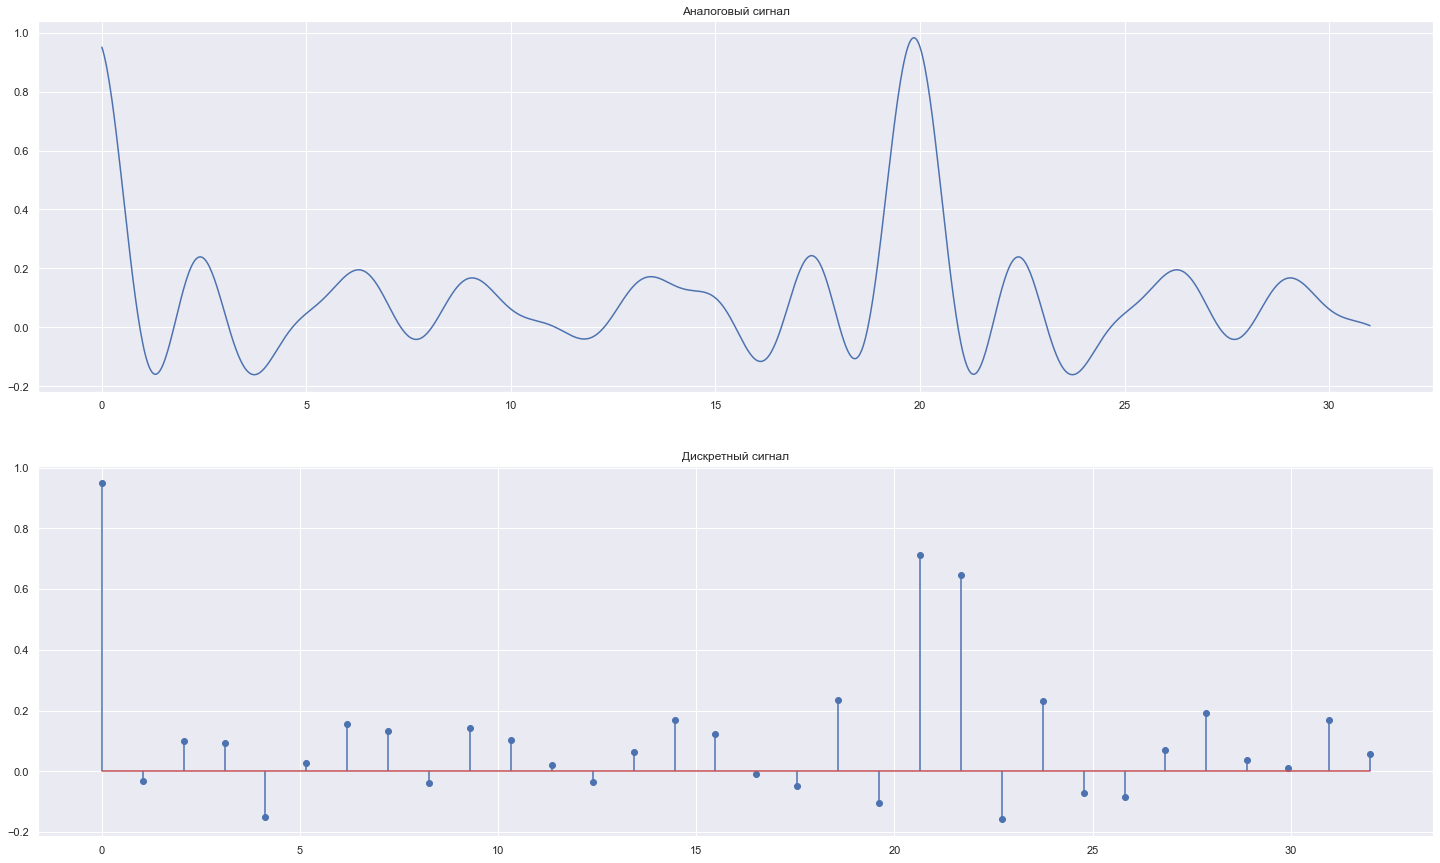

In [74]:
fig, axs = plt.subplots(2, figsize=(25,15))

x_an, analog_sig = analog_signal(31)
x_dis, d_signal = discrete_signal(analog_sig)

axs[0].plot(x_an, analog_sig)
axs[1].stem(x_dis, d_signal, use_line_collection=True)
axs[0].set_title('Аналоговый сигнал')
axs[1].set_title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их.

Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N = 20$. Получим дискретную функцию с периодом $NT$, где $T$ - период дискретизации:

$$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$$

Спектр $s(t)$ также должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

$s(t)$ - периодическая функция, следовательно, мы можем разложить ее в ряд Фурье с помощью ДПФ.

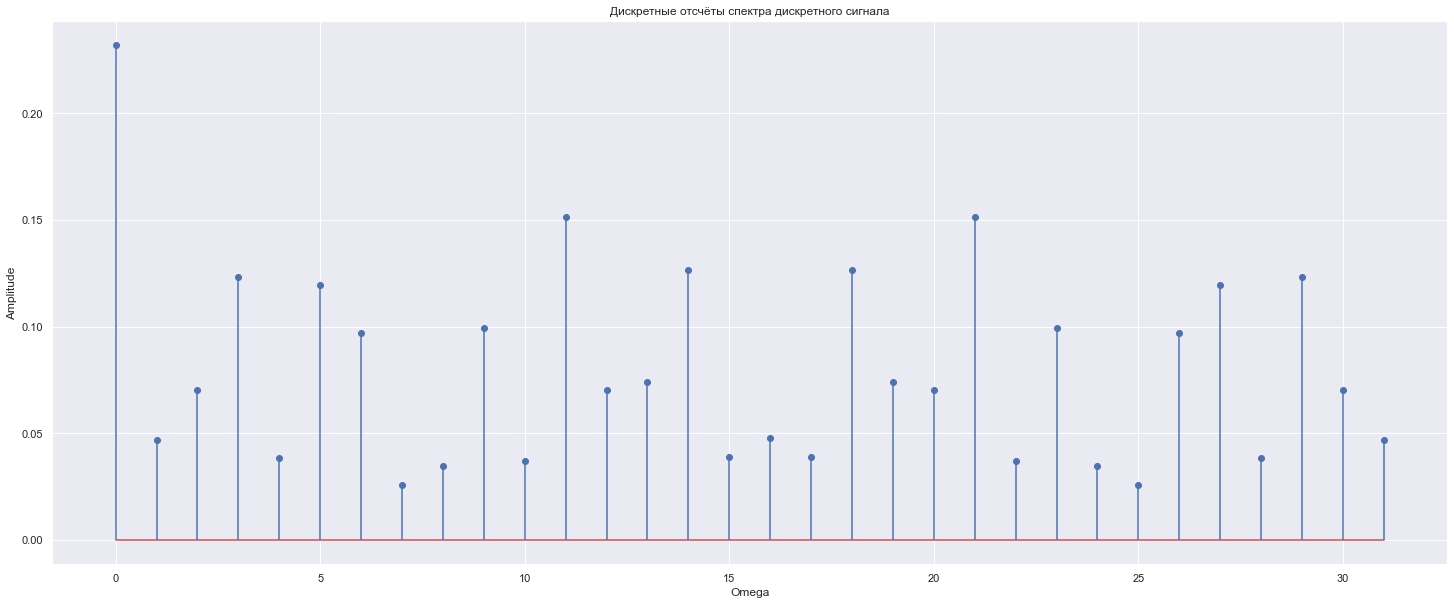

In [75]:
from scipy.fftpack import fft
plt.figure(figsize=(25, 10))
plt.stem(2*np.abs(fft(d_signal))/32, use_line_collection=True)
plt.ylabel(r'Amplitude')
plt.xlabel('Omega')
plt.title('Дискретные отсчёты спектра дискретного сигнала')
plt.show()

4. Создадим функции сглаживания: линейную для любого количества точек, для полинома 2 степени по 5 и 9 точкам, для полинома 4 степени по 7 и 11 точкам, применим линейное сглаживание к дискретному сигналу по 5 и 9 точкам. Все функции указаны в основных теоретичиских положениях.

In [76]:
linear_smoothing = lambda y, points: np.convolve(y, np.ones(points), 'same') / points

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

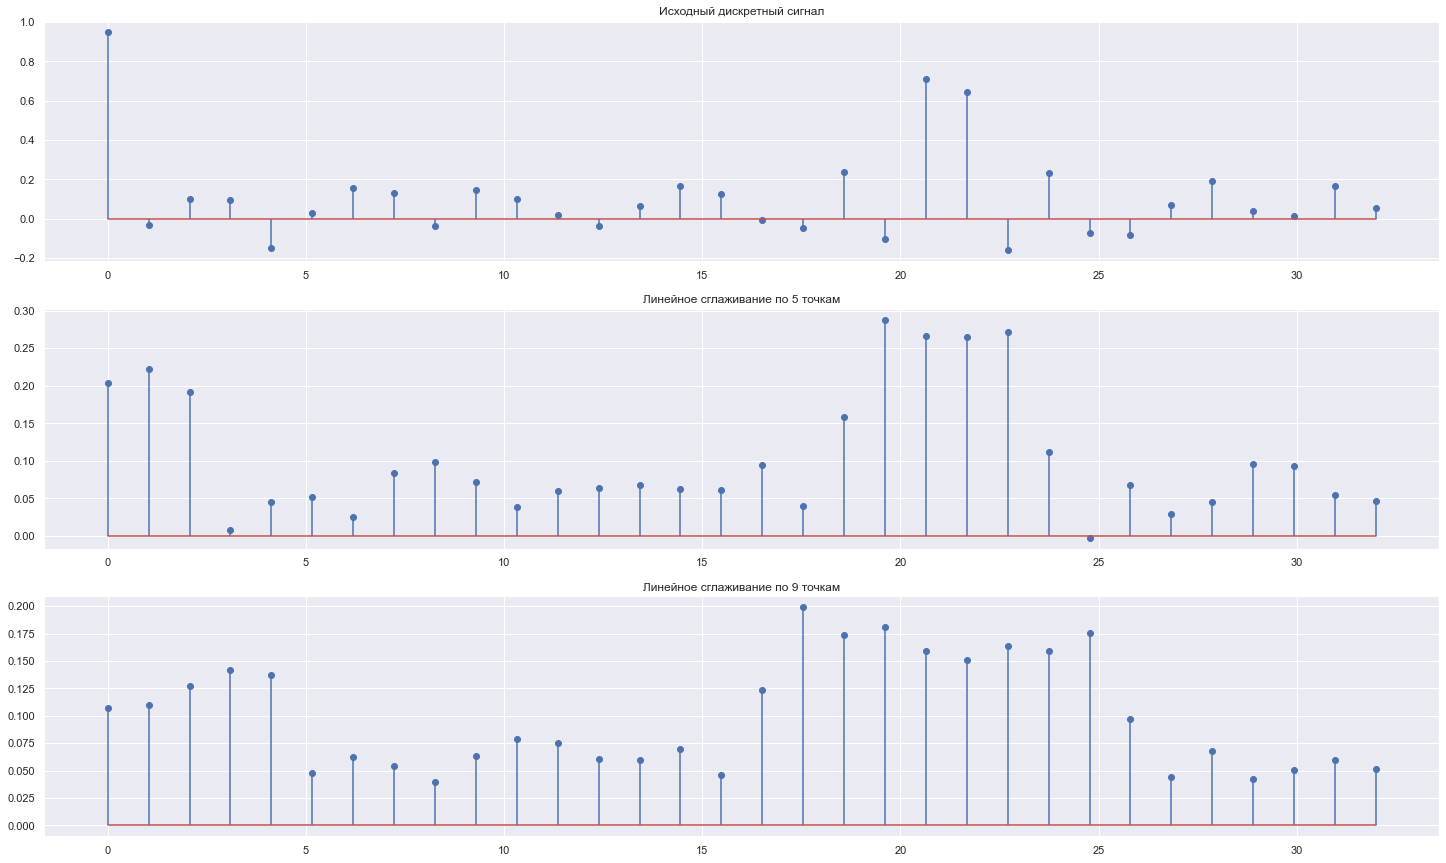

In [77]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(x_dis, d_signal, use_line_collection=True)
axs[1].stem(x_dis, linear_smoothing(d_signal, 5), use_line_collection=True)
axs[2].stem(x_dis, linear_smoothing(d_signal, 9), use_line_collection=True)
axs[0].set_title('Исходный дискретный сигнал')
axs[1].set_title('Линейное сглаживание по 5 точкам')
axs[2].set_title('Линейное сглаживание по 9 точкам')
plt.show()

6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [78]:
spectrum = 2*np.abs(fft(d_signal)) / len(d_signal)

specrt_5 = 2*np.abs(fft(linear_smoothing(d_signal, 5))) / len(d_signal)

specrt_9 = 2*np.abs(fft(linear_smoothing(d_signal, 9))) / len(d_signal)

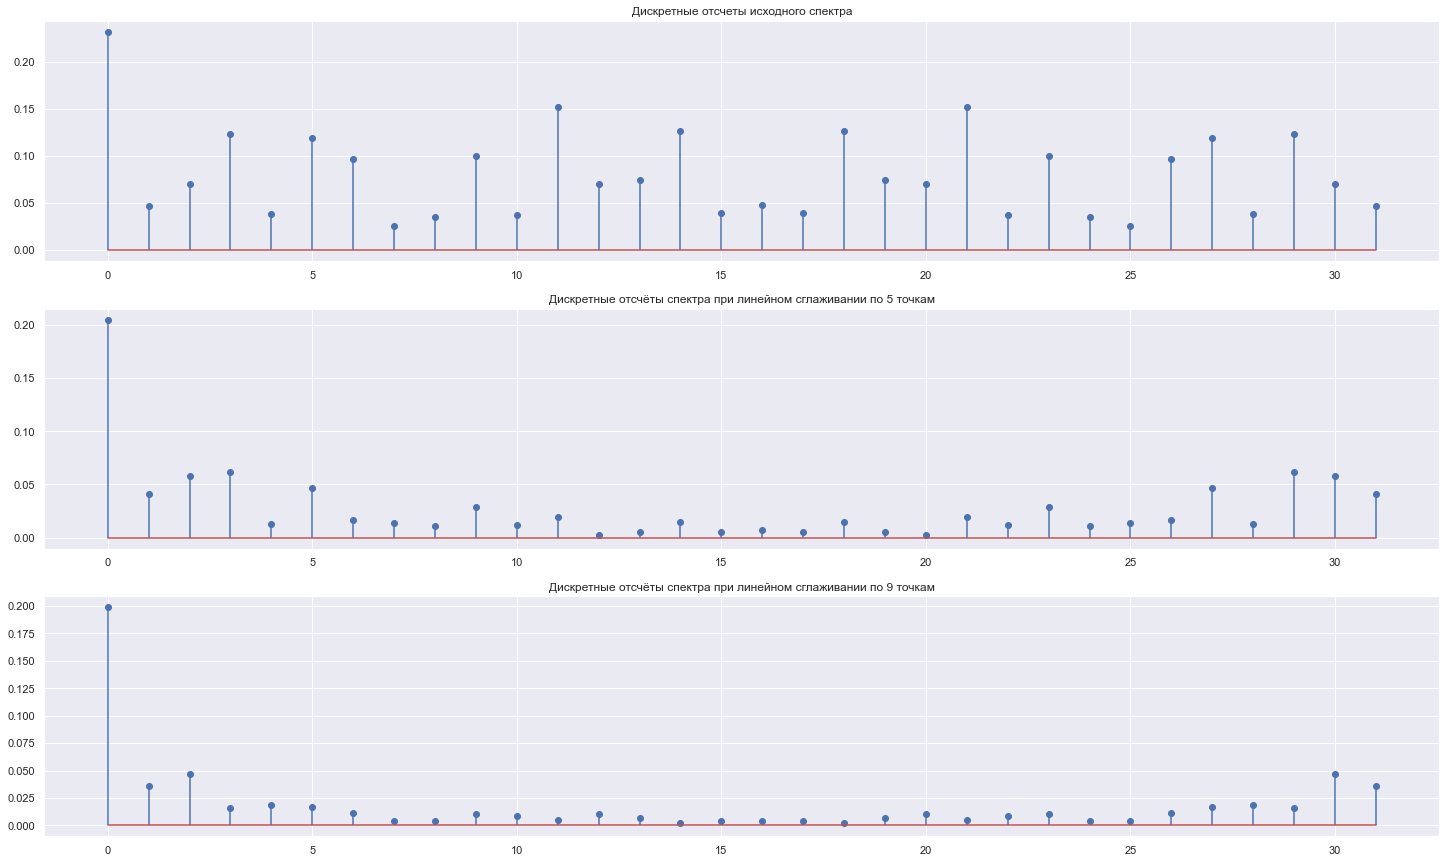

In [79]:
fig, axs = plt.subplots(3, figsize=(25,15))

axs[0].stem(spectrum, use_line_collection=True)
axs[1].stem(specrt_5, use_line_collection=True)
axs[2].stem(specrt_9, use_line_collection=True)
axs[0].set_title('Дискретные отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчёты спектра при линейном сглаживании по 5 точкам')
axs[2].set_title('Дискретные отсчёты спектра при линейном сглаживании по 9 точкам')
plt.show()

7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

In [80]:
t = np.linspace(0.001, np.pi, 500)
h5 = lambda x: (np.sin(5*np.pi*x))/(5*np.sin(np.pi*x))
h9 = lambda x: (np.sin(9*np.pi*x))/(9*np.sin(np.pi*x))

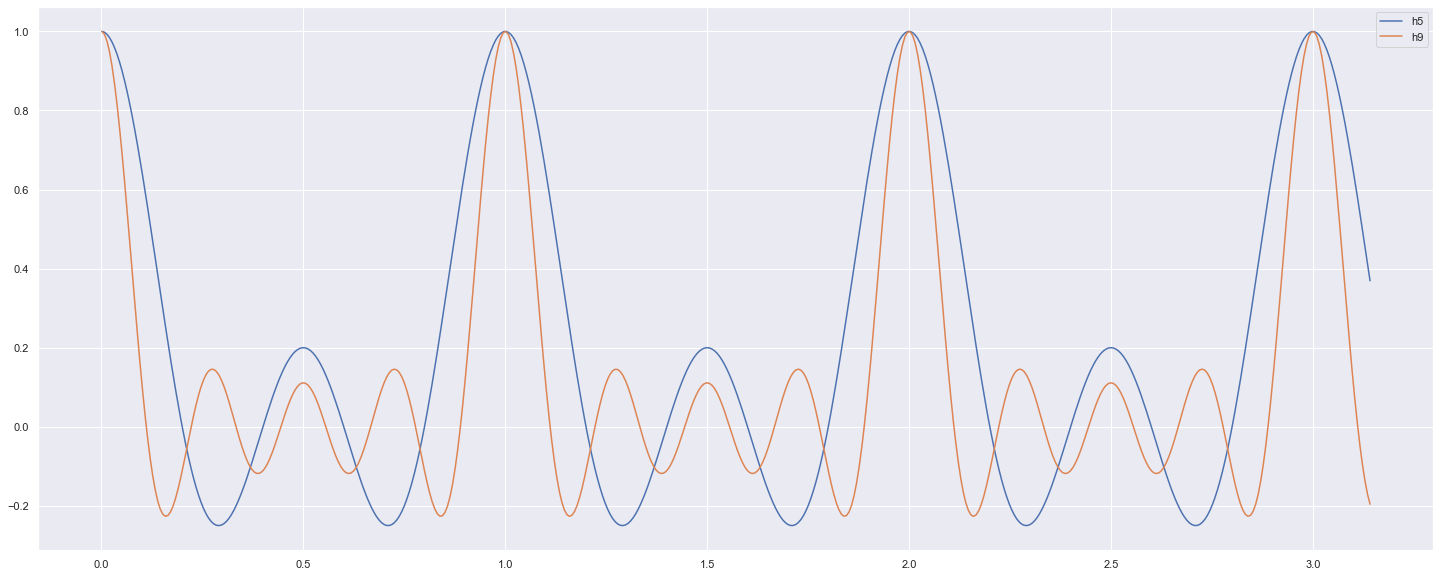

In [81]:
plt.figure(figsize=(25, 10))

plt.plot(t, h5(t), label="h5")
plt.plot(t, h9(t), label="h9")
plt.legend()

На графиках видно сопостовление непрерывной во времени бесконечной функции $\displaystyle y_n$ другой, непрерывной по частоте, бесконечной функции, а именно спектру $\displaystyle X(n)$. Можно заметить, что амплитуда гармоник высоких частот снижена в спектре сглаженного сигнала.

8. Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    
    b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Передаточная функция дифференцирующего фильтра имеет вид:

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}-e^{-i\omega}}{2}$$

Определим дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

In [82]:
diff_1_smooth = lambda y: np.convolve(y, np.array([-1, 0, 1]), 'same') / 2

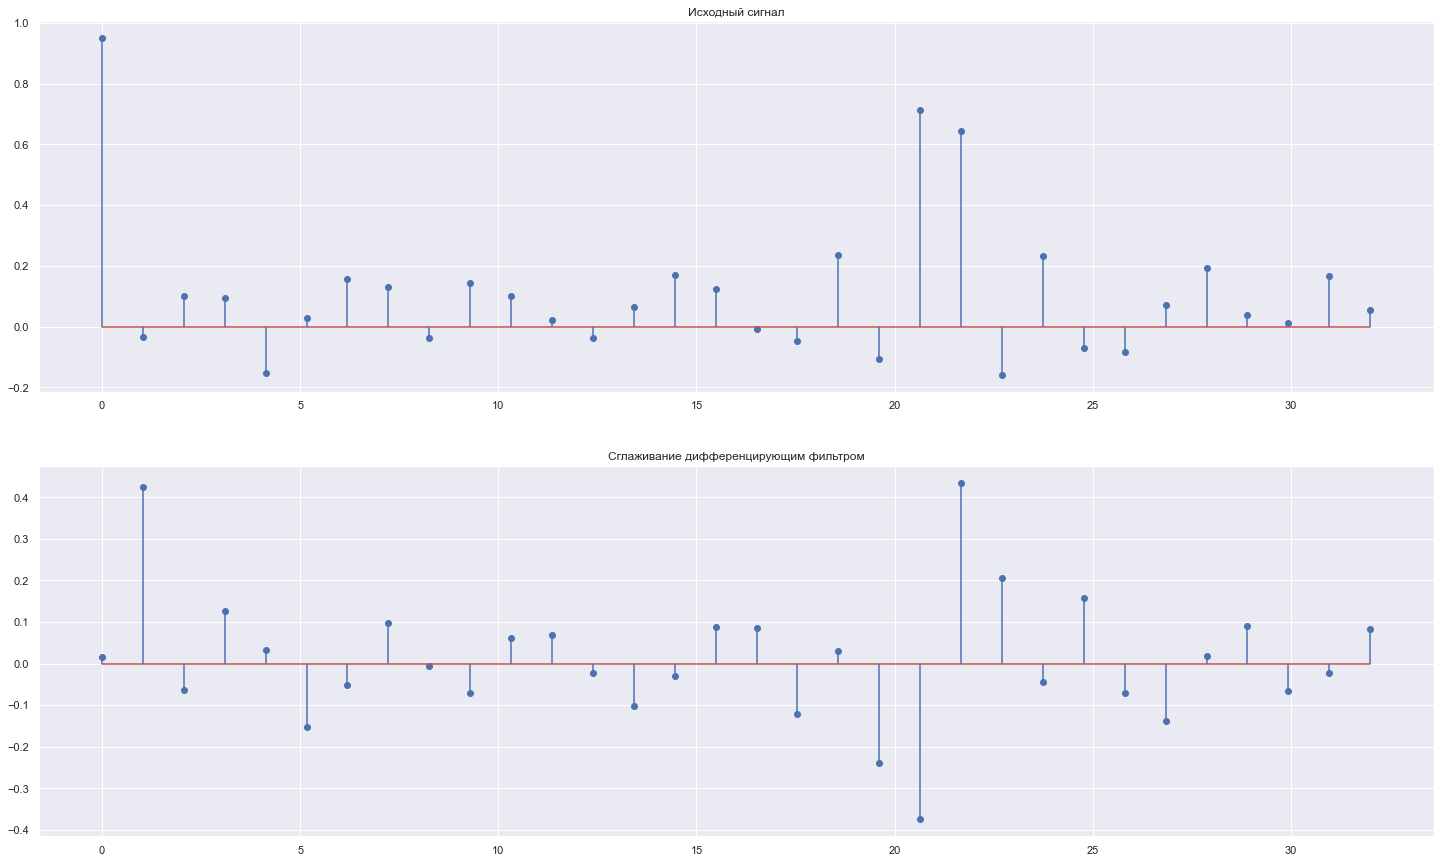

In [83]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(x_dis, d_signal, use_line_collection=True)
axs[1].stem(x_dis, diff_1_smooth(d_signal), use_line_collection=True)
axs[0].set_title('Исходный сигнал')
axs[1].set_title('Сглаживание дифференцирующим фильтром')
plt.show()

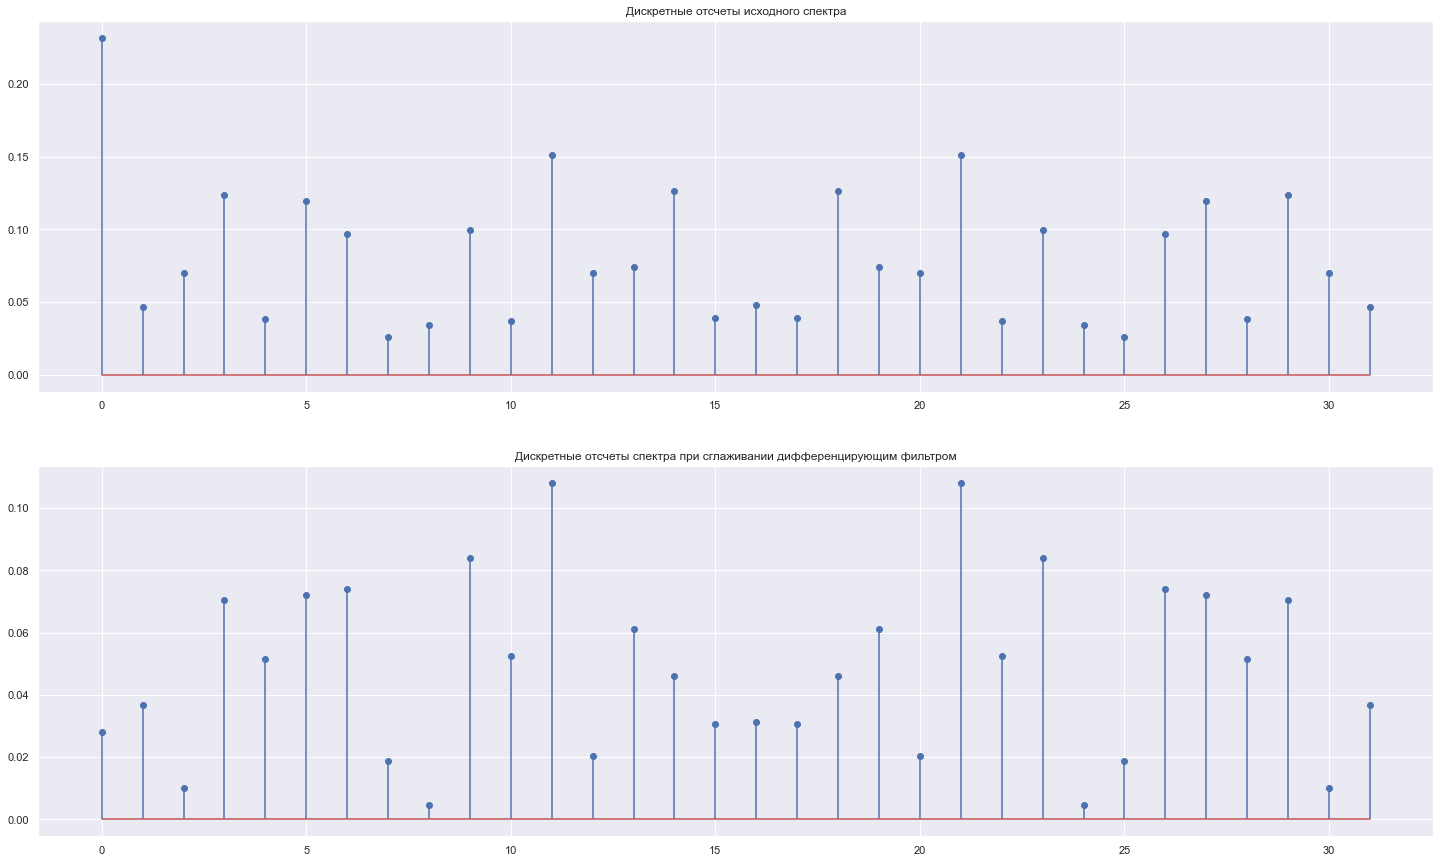

In [84]:
fig, axs = plt.subplots(2, figsize=(25,15))
spectrum_diff_1 = 2*np.abs(fft(diff_1_smooth(d_signal))) / len(d_signal)

axs[0].stem(spectrum, use_line_collection=True)
axs[1].stem(spectrum_diff_1, use_line_collection=True)
axs[0].set_title('Дискретные отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчеты спектра при сглаживании дифференцирующим фильтром')

plt.show()

Из графиков спектров видно, что фильтр, соответствующий дифференцированию 1-го порядка, больше подавляет низкие и высокие частоты.

Ниже представлены передаточные функции для рекурсивных фильтров, соответствующих численному интегрированию.

Для прямоугольников:

$$\displaystyle H(\omega)=\dfrac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}=\dfrac{1}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

Для трапеций:

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}+1}{2(e^{i\omega}-1)}=\dfrac{cos\big(\frac{\omega}{2}\big)}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

Для формул Симпсона:

$$\displaystyle H(\omega)=\dfrac{e^{-i\omega}+4+e^{i\omega}}{3(e^{i\omega}-e^{-i\omega})}=\dfrac{cos(\omega)+2}{3i\cdot sin(\omega)}$$

Определим фильтры, соответствующие интегрированию.

In [85]:
# Интегрирование методом прямоугольников
def rectangle(signal):
    s = np.empty(len(signal))
    s[0] = 0
    for i in range(1, len(signal)):
        s[i] = s[i-1] + signal[i-1]
    return s

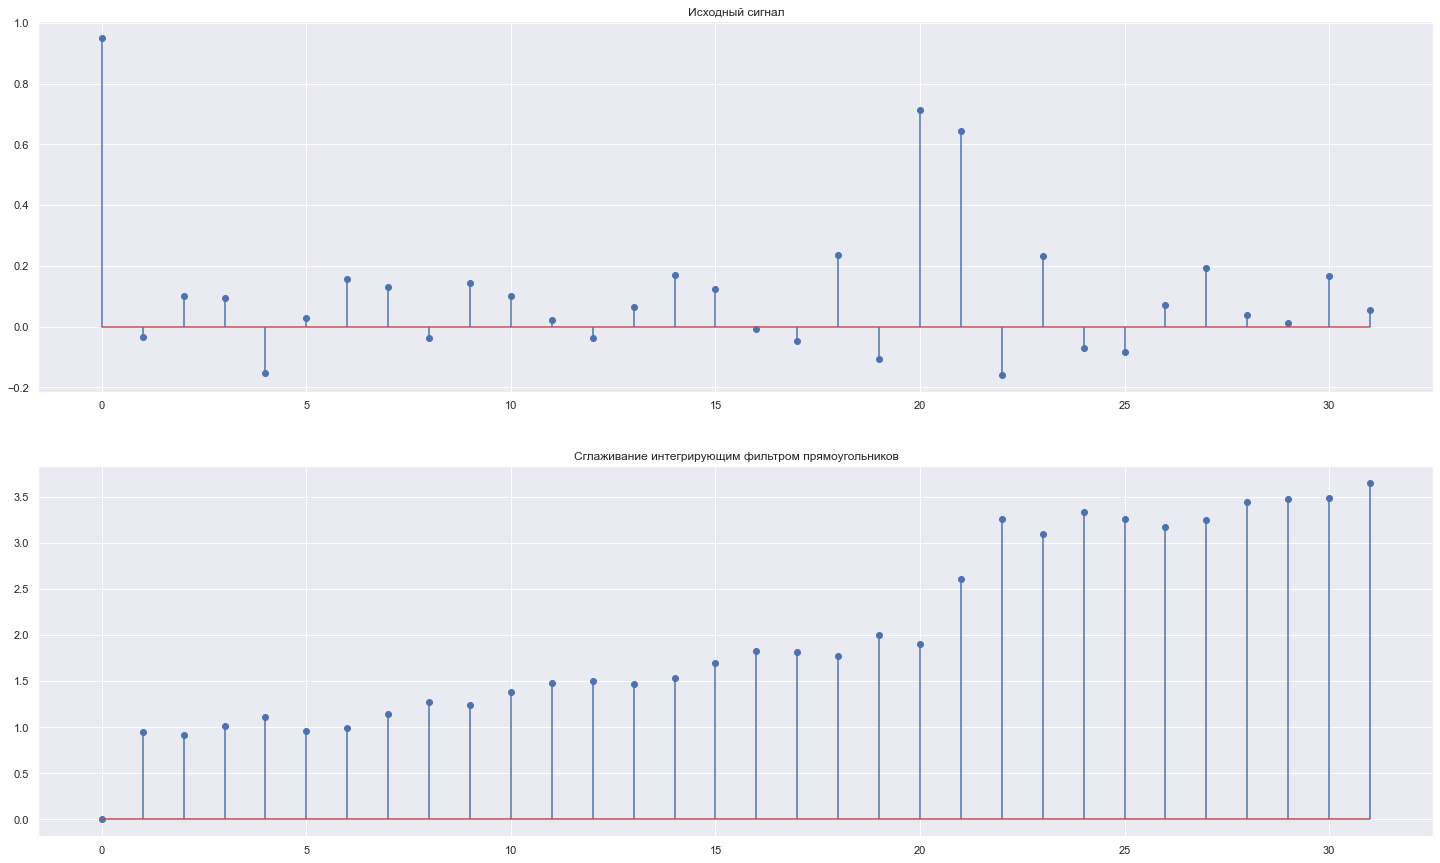

In [86]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(d_signal, use_line_collection=True)
axs[1].stem(rectangle(d_signal), use_line_collection=True)
axs[0].set_title('Исходный сигнал')
axs[1].set_title('Сглаживание интегрирующим фильтром прямоугольников')

plt.show()

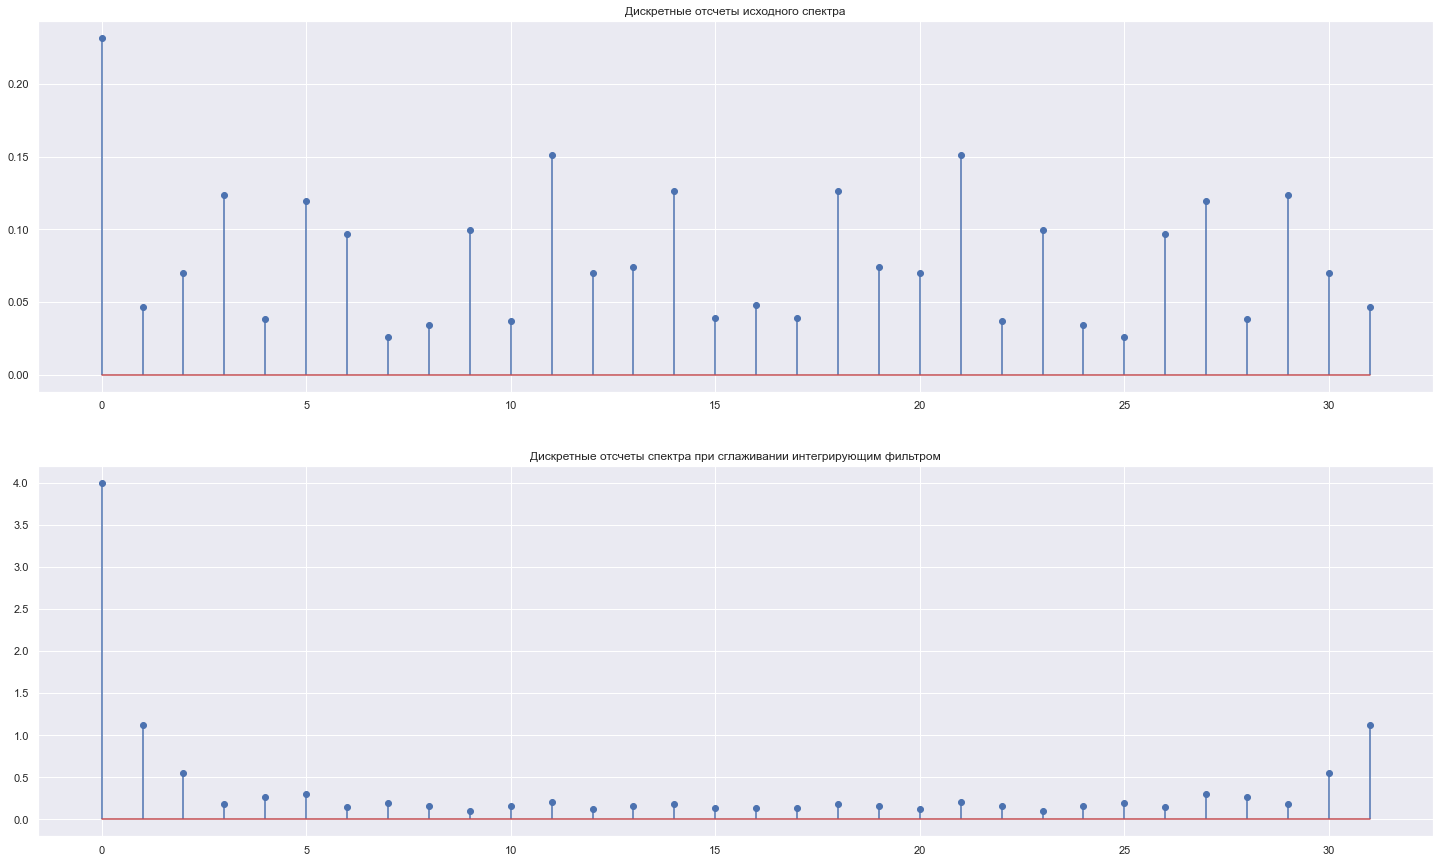

In [87]:
fig, axs = plt.subplots(2, figsize=(25,15))
spectrum_integ_rect = 2*np.abs(fft(rectangle(d_signal))) / len(d_signal)

axs[0].stem(spectrum, use_line_collection=True)
axs[1].stem(spectrum_integ_rect, use_line_collection=True)
axs[0].set_title('Дискретные отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

plt.show()

Из графиков спектров видно, что интегрирование методом прямоугольников усиливает низкие частоты, оставляя другие практически без изменений.

In [88]:
# Интегрирование методом трапеций
def trapezoid(signal):
    s = np.empty(len(signal))
    s[0] = 0
    for i in range(1, len(signal)):
        s[i] = s[i - 1] + (signal[i] + signal[i-1]) / 2
    return s

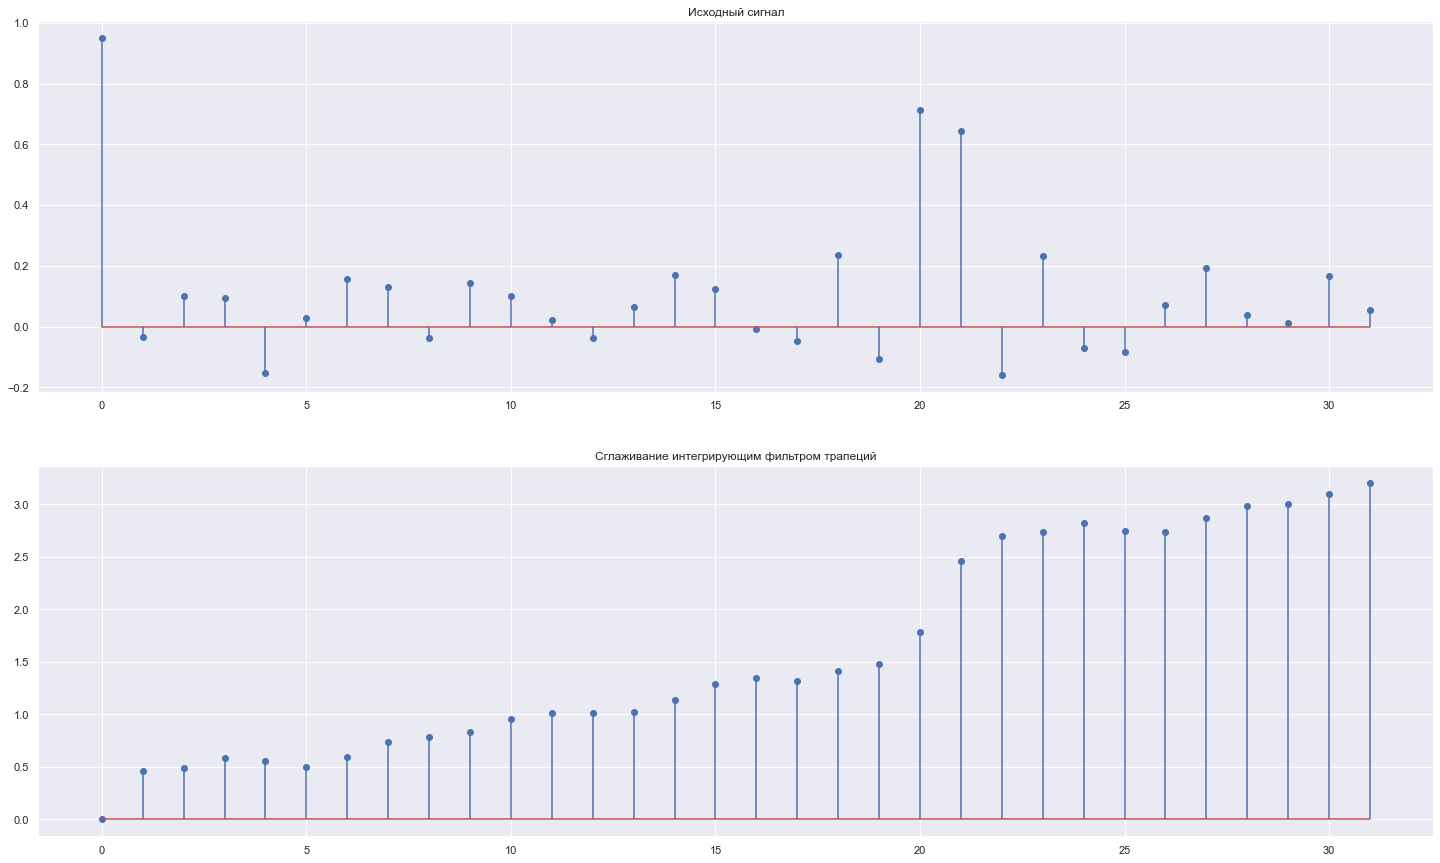

In [89]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(d_signal, use_line_collection=True)
axs[1].stem(trapezoid(d_signal), use_line_collection=True)
axs[0].set_title('Исходный сигнал')
axs[1].set_title('Сглаживание интегрирующим фильтром трапеций')

plt.show()

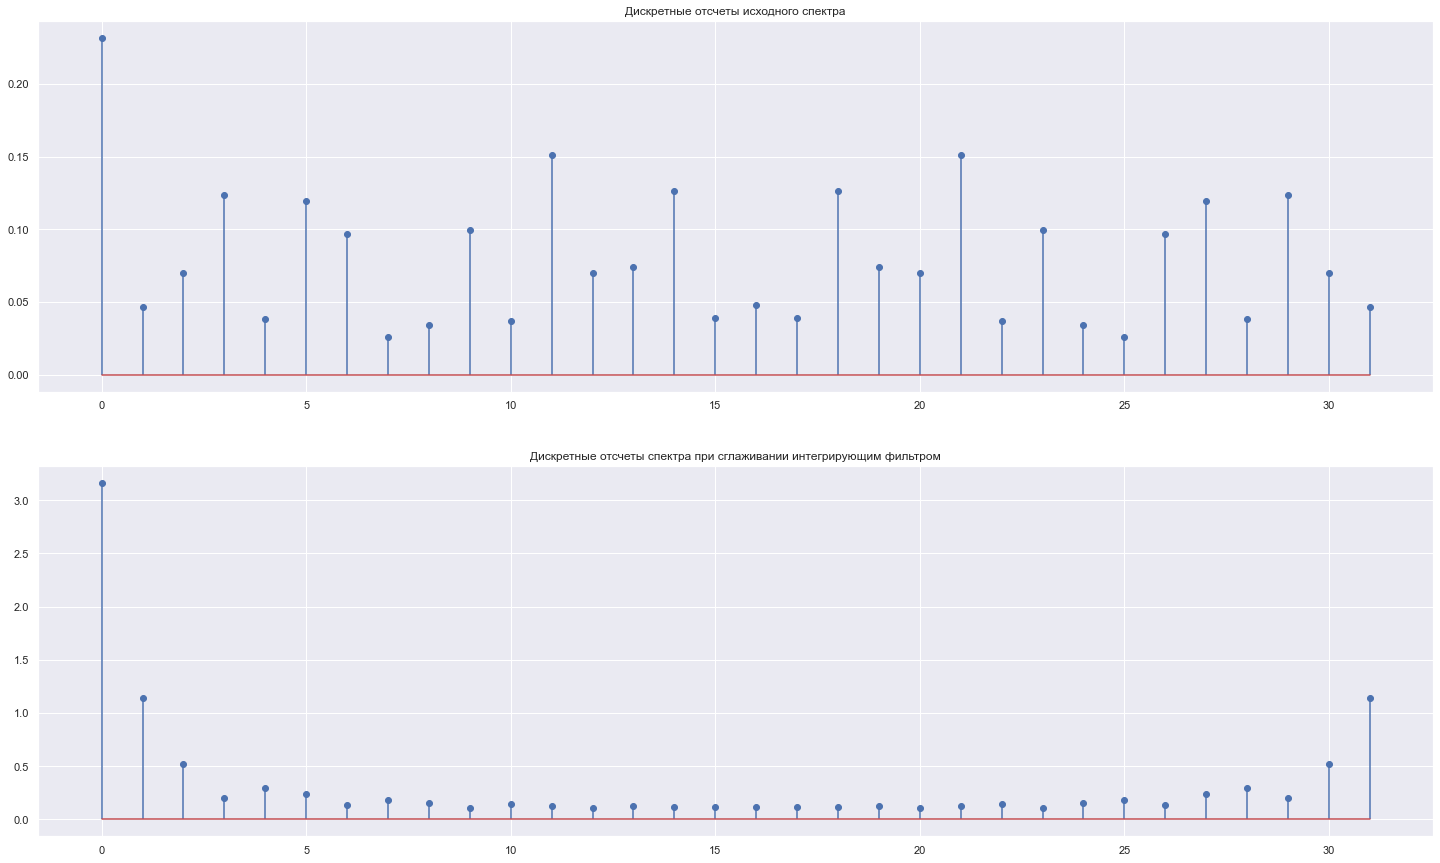

In [90]:
fig, axs = plt.subplots(2, figsize=(25,15))
spectrum_integ_trap = 2*np.abs(fft(trapezoid(d_signal))) / len(d_signal)

axs[0].stem(spectrum, use_line_collection=True)
axs[1].stem(spectrum_integ_trap, use_line_collection=True)
axs[0].set_title('Дискретные отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

plt.show()

При интегрировании методом трапеций усиление сигнала на так велико, однако расширен диапазон усиливаемых частот.

In [91]:
# Интегрирование по формулам Симпсона
def simpson(signal):
    s = np.empty(len(signal))
    s[0] = 0
    for i in range(1, len(signal)-1):
        s[i] = s[i-1] + (signal[i-1] + 4*signal[i] + signal[i+1]) / 3
    return s

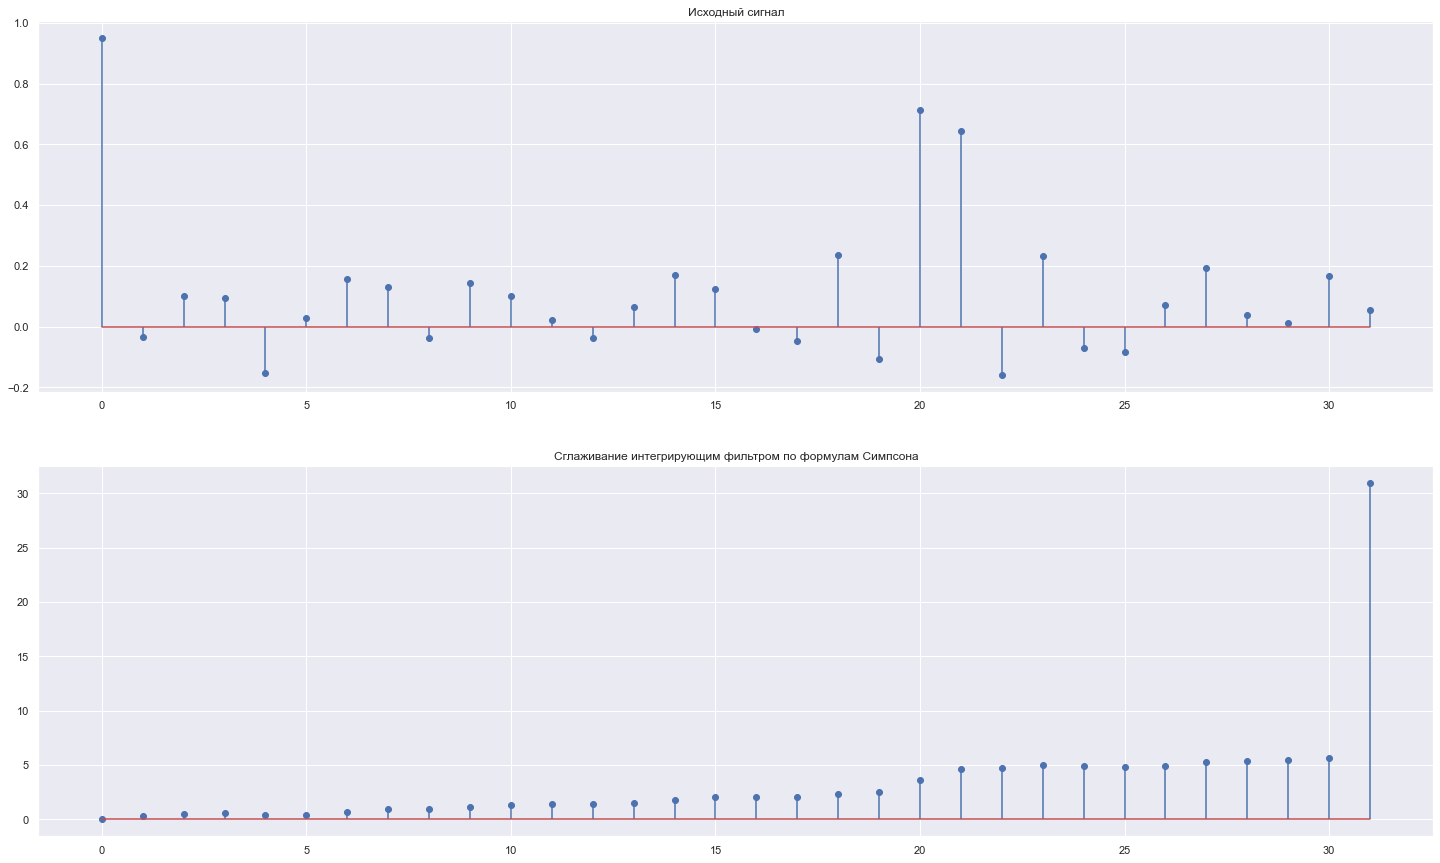

In [92]:
fig, axs = plt.subplots(2, figsize=(25,15))

axs[0].stem(d_signal, use_line_collection=True)
axs[1].stem(simpson(d_signal), use_line_collection=True)
axs[0].set_title('Исходный сигнал')
axs[1].set_title('Сглаживание интегрирующим фильтром по формулам Симпсона')

plt.show()

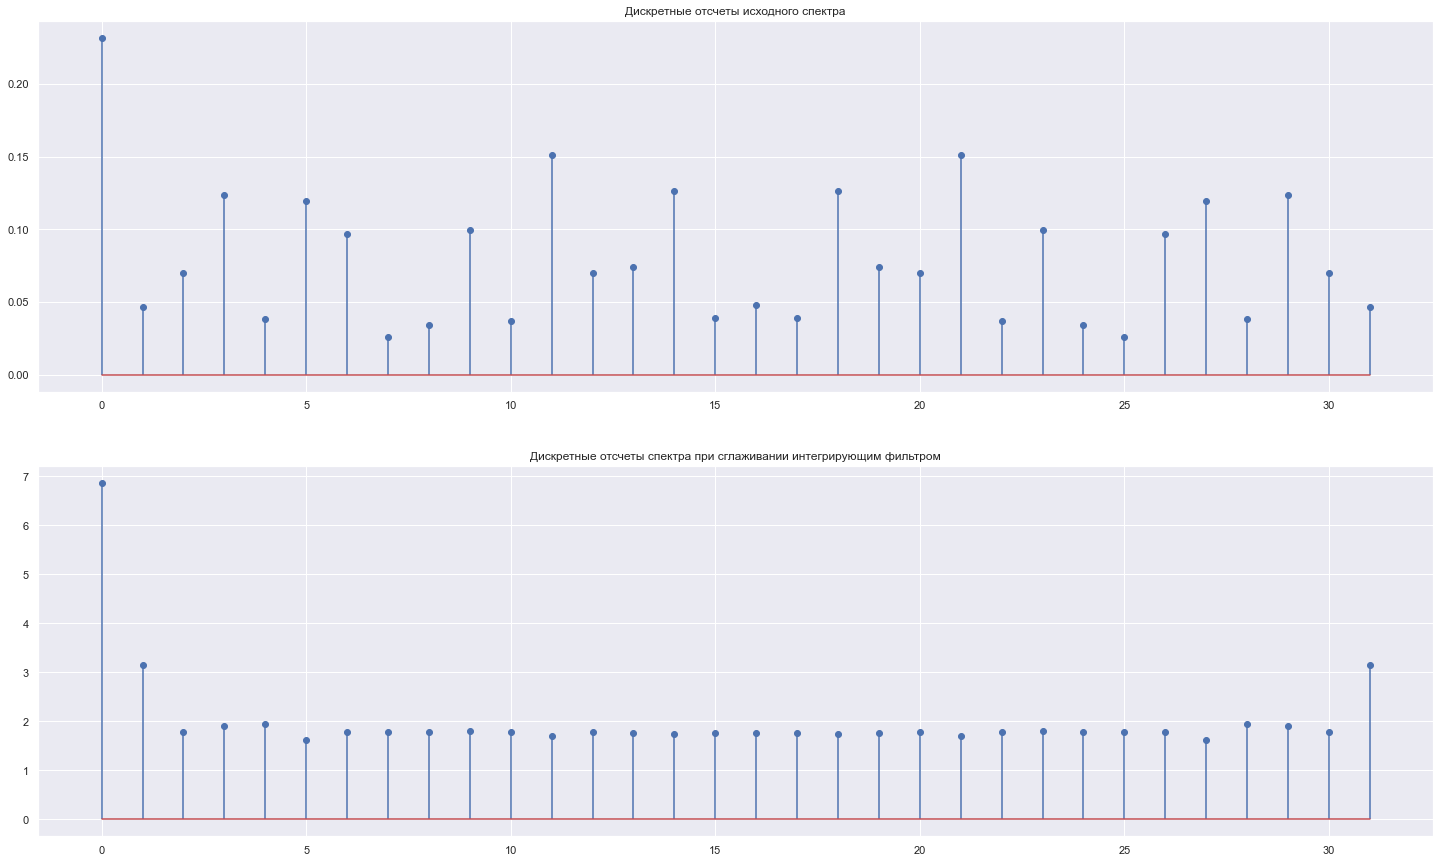

In [93]:
fig, axs = plt.subplots(2, figsize=(25,15))
spectrum_integ_simp = 2*np.abs(fft(simpson(d_signal))) / len(d_signal)

axs[0].stem(spectrum, use_line_collection=True)
axs[1].stem(spectrum_integ_simp, use_line_collection=True)
axs[0].set_title('Дискретные отсчеты исходного спектра')
axs[1].set_title('Дискретные отсчеты спектра при сглаживании интегрирующим фильтром')

plt.show()

При интегрировании по формулам Симпсона усиливаются все частоты, наибольшее усиление применяется к низким частотам.

## Выводы

В ходе выполнения лабораторной работы были получены практические навыки выполнения фильтрования дискретных сигналов с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

Были построены графики дискретного сигнала до и после обработки различными фильтрами, для каждого фильтра проведён спектральный анализ.